# Wisconsin Breast Cancer 

In [94]:
# Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import keras
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [67]:
# Load the dataset
df=pd.read_csv("Wisconsin_Breast_Cancer_dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Conclusion= The dataset has been loaded properly. There are some unwanted columns like id and Unnamed: 32 which will not help in prediction so let us drop them.

In [68]:
# Dropping the unwanted columns
df=df.drop(["id","Unnamed: 32"],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [69]:
# Checking the shape and Size of the data
print(df.size)
print(df.shape)

17639
(569, 31)


In [70]:
# Checking the dtype and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Conclusion=The dtype is matching with the data so there is no need of any change of dtype. There are no missing values.

In [71]:
# Descriptive statistics of the numeric variables
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [72]:
# Chekcing the skewness
df.skew()

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

Conclusion=There is not much of right and left skewed data but there is some amount of skewness present in area_se and concavity_se. This will be taken care during data scaling.

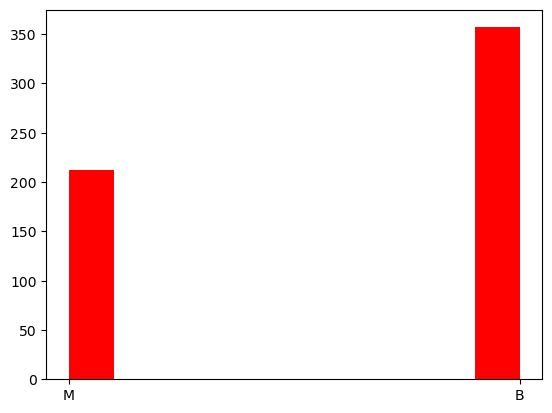

In [73]:
# Visulizataion of the target col
plt.hist(df["diagnosis"],color=["red"]);

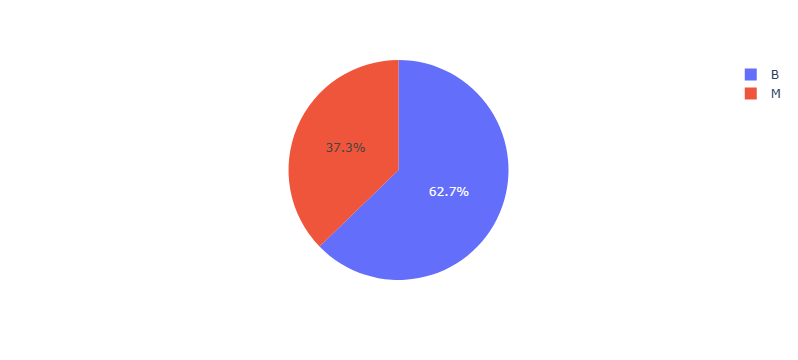

In [74]:
# Visulizataion of the target col
px.pie(names=df["diagnosis"])

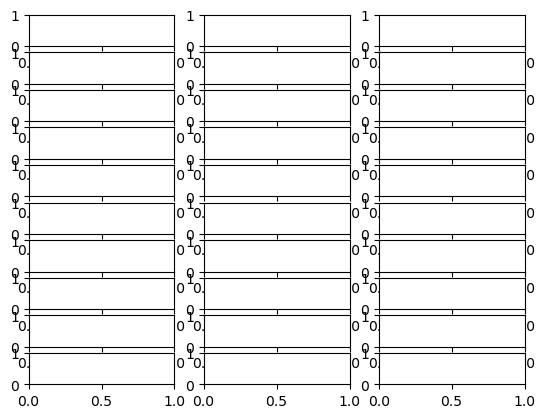

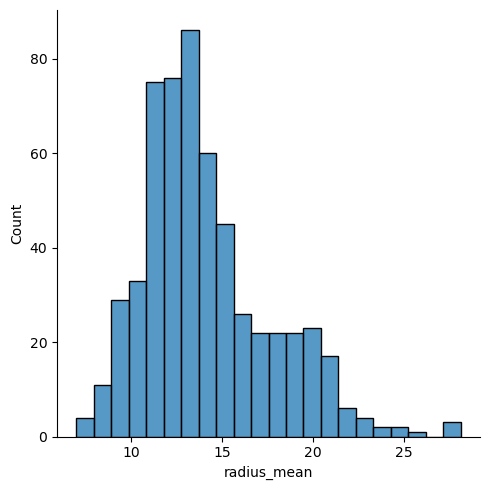

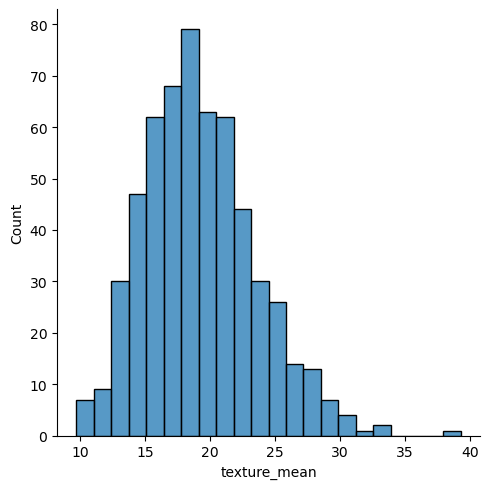

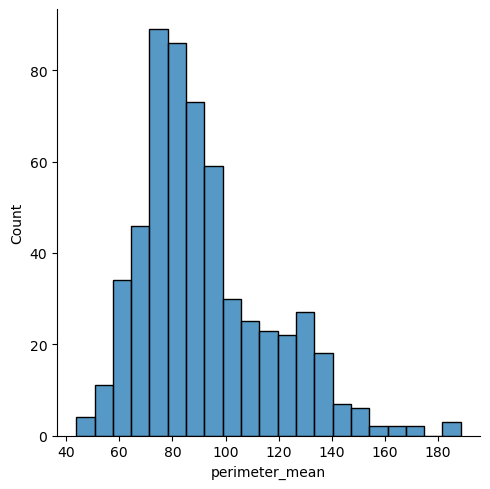

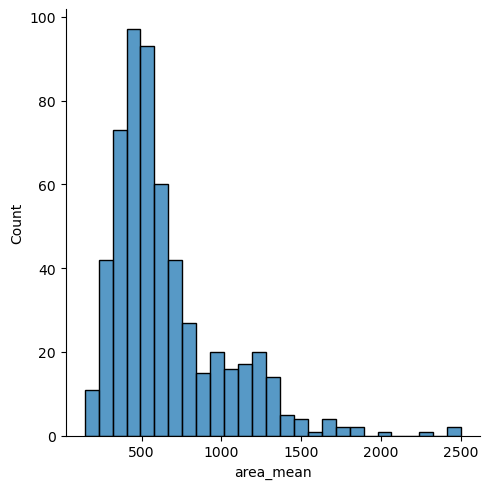

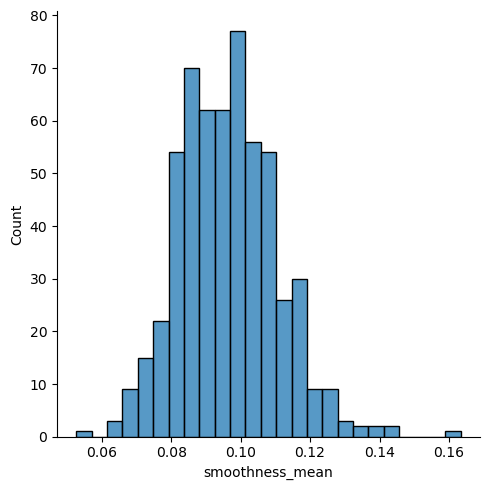

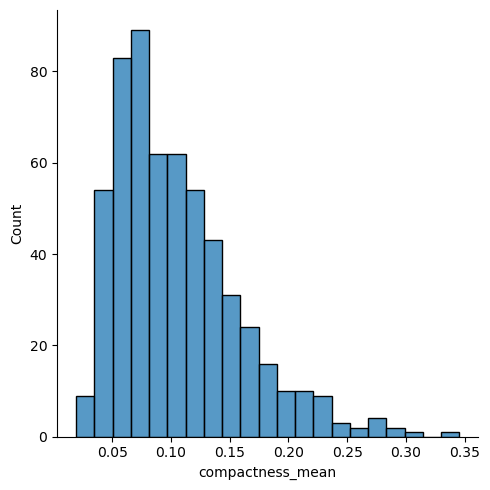

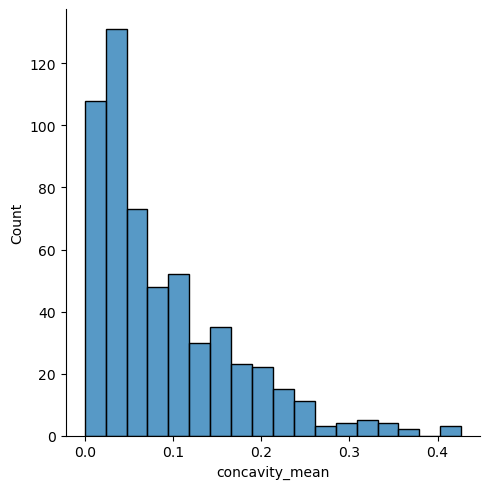

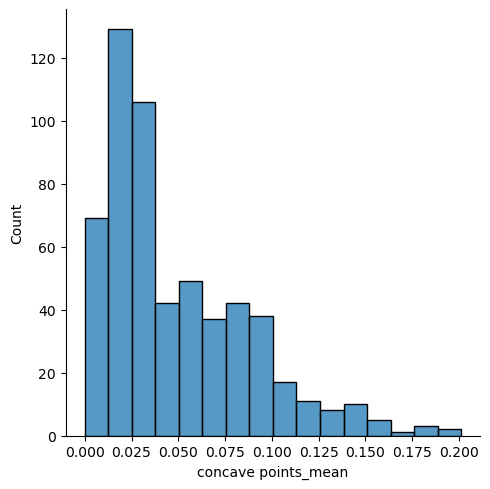

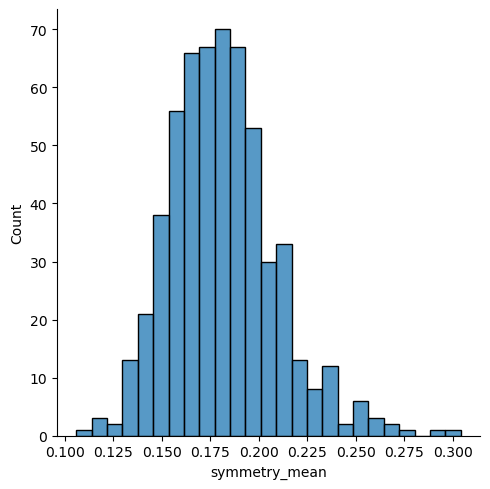

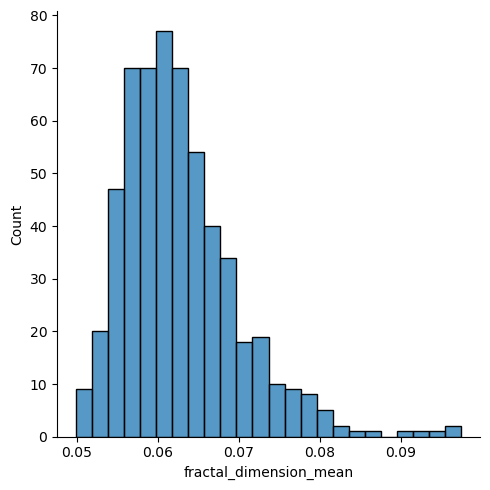

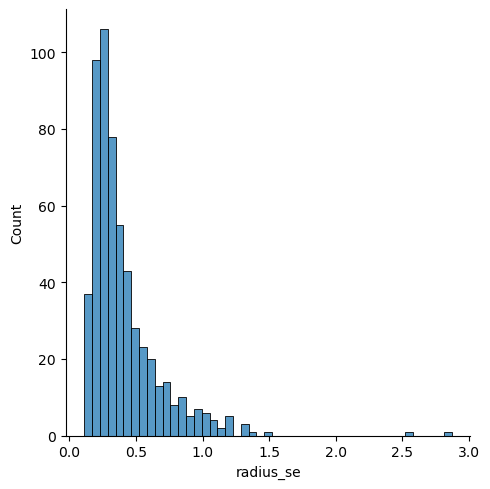

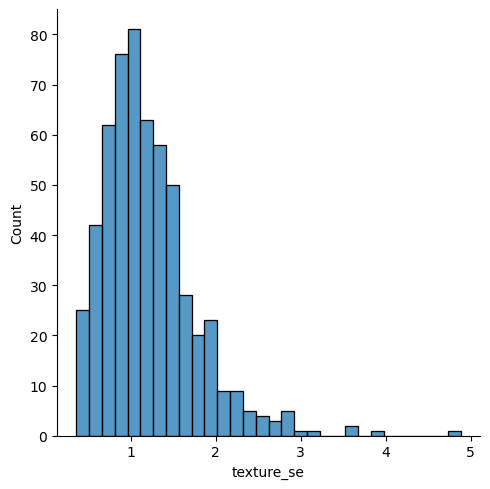

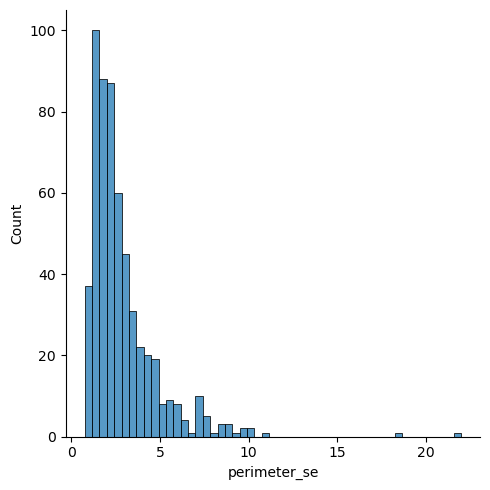

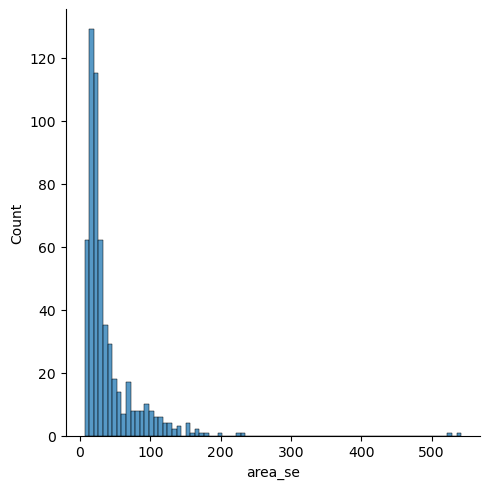

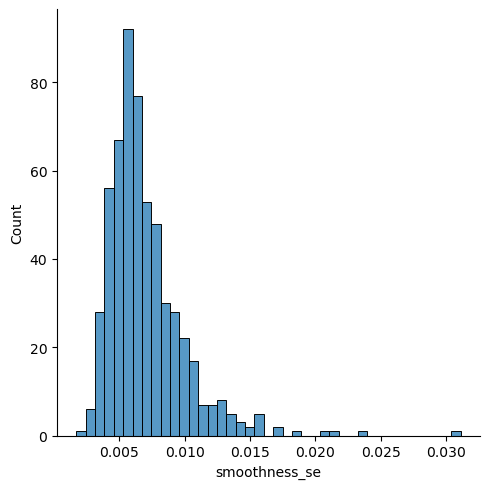

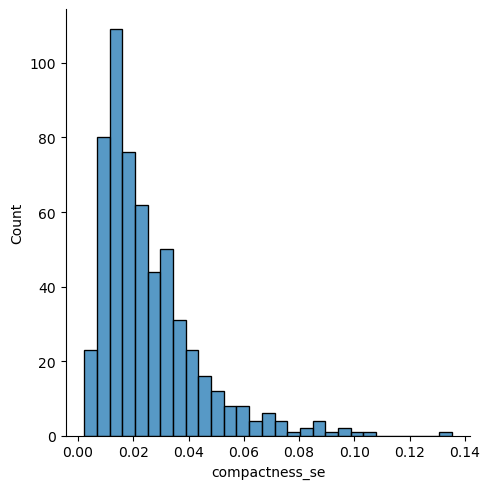

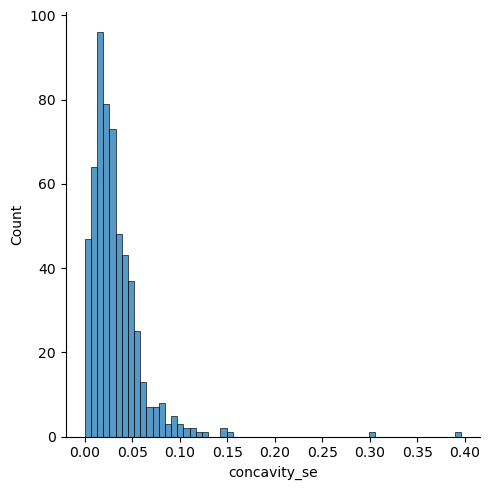

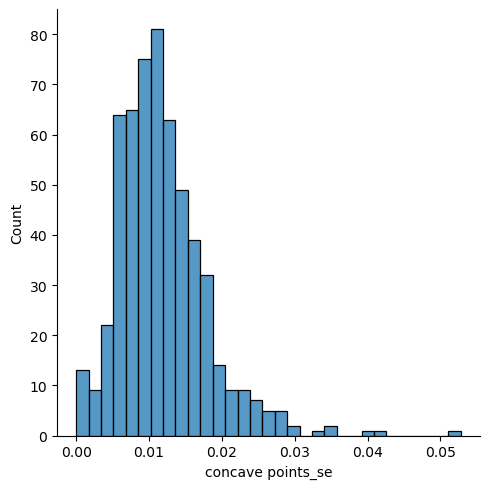

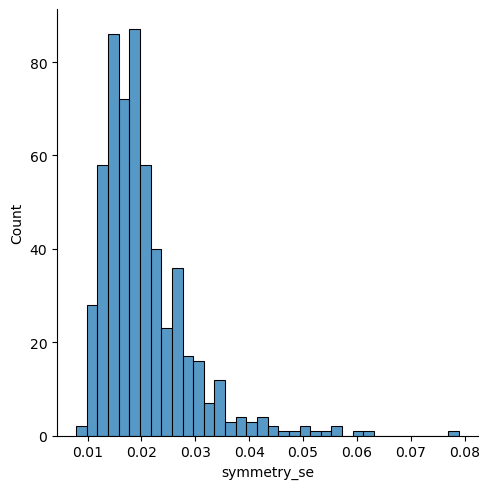

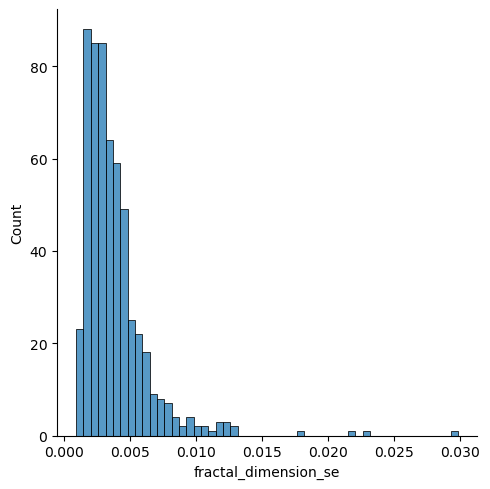

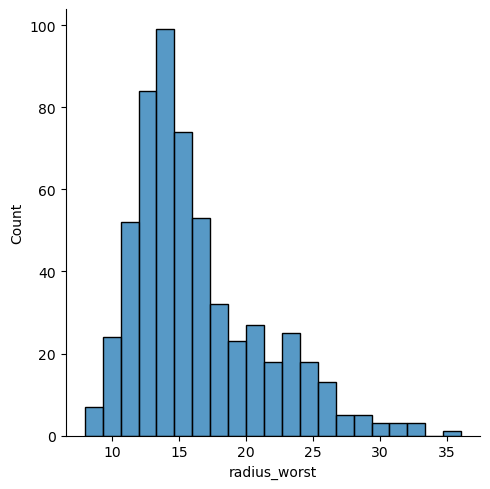

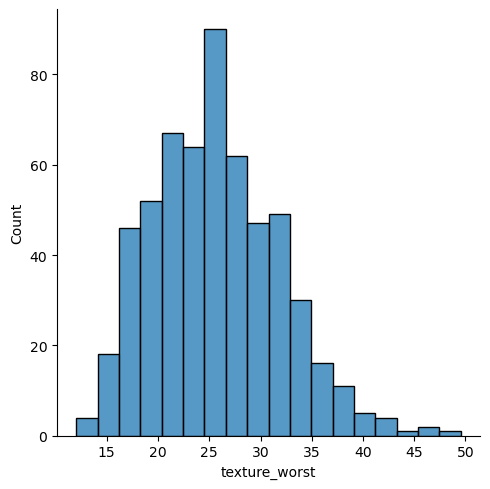

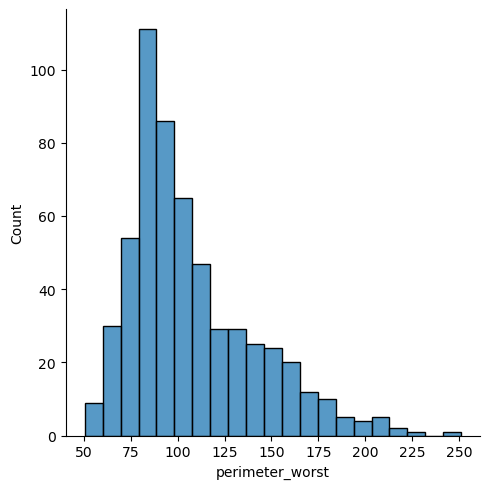

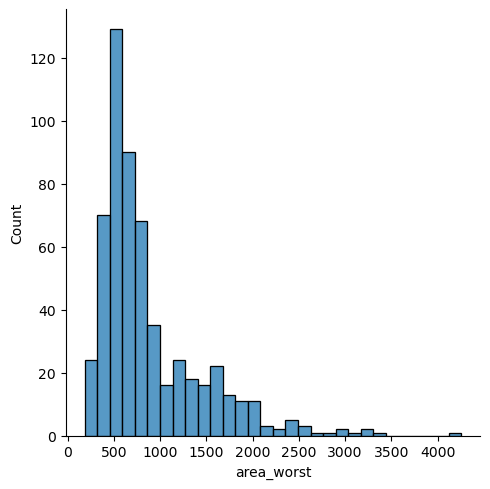

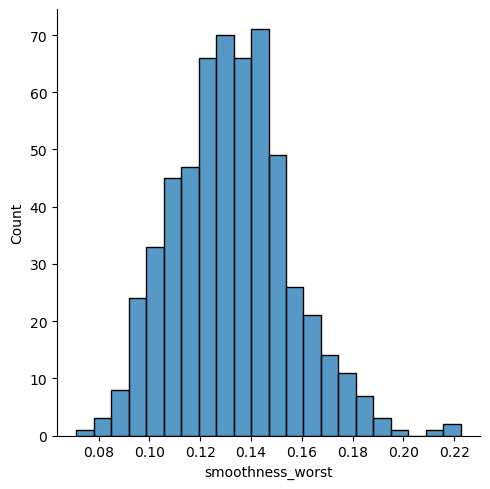

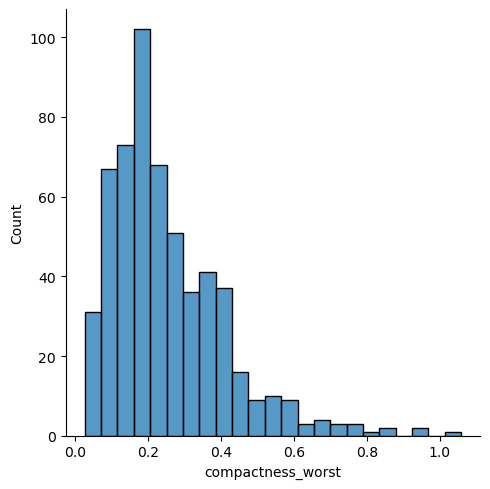

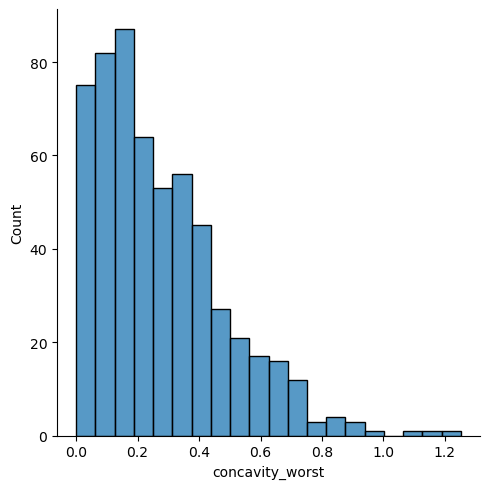

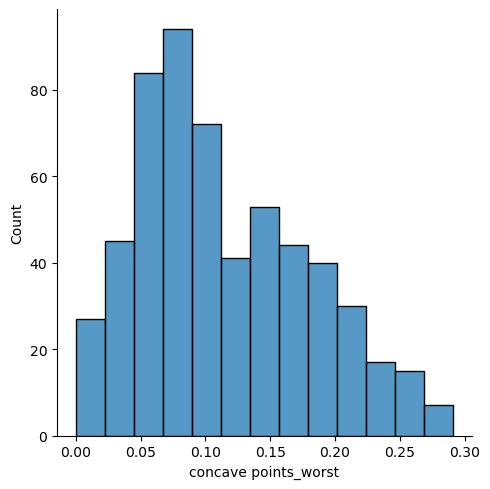

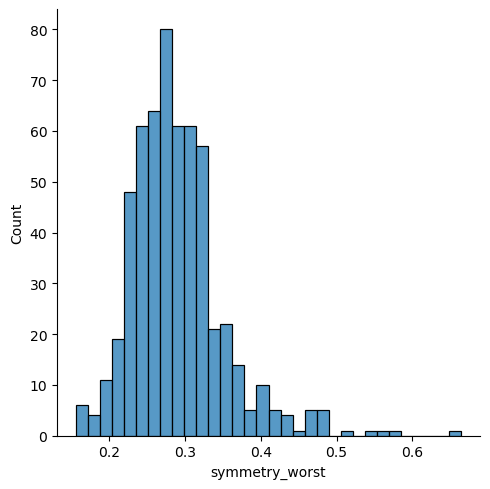

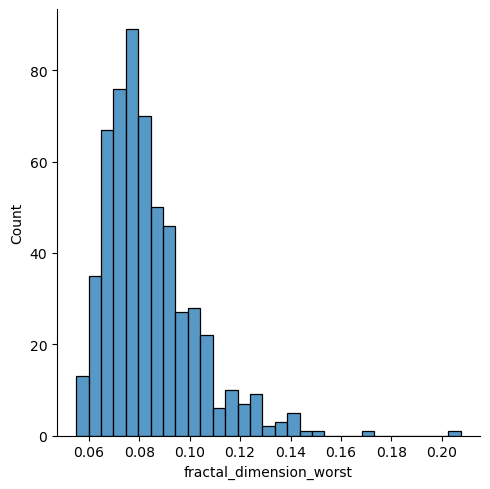

In [75]:
# Data visulization of the numeric data
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=10,ncols=3)
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.displot(df[col],ax=sub)

In [76]:
# Missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Conclusion=There are no missing values in the dataset.

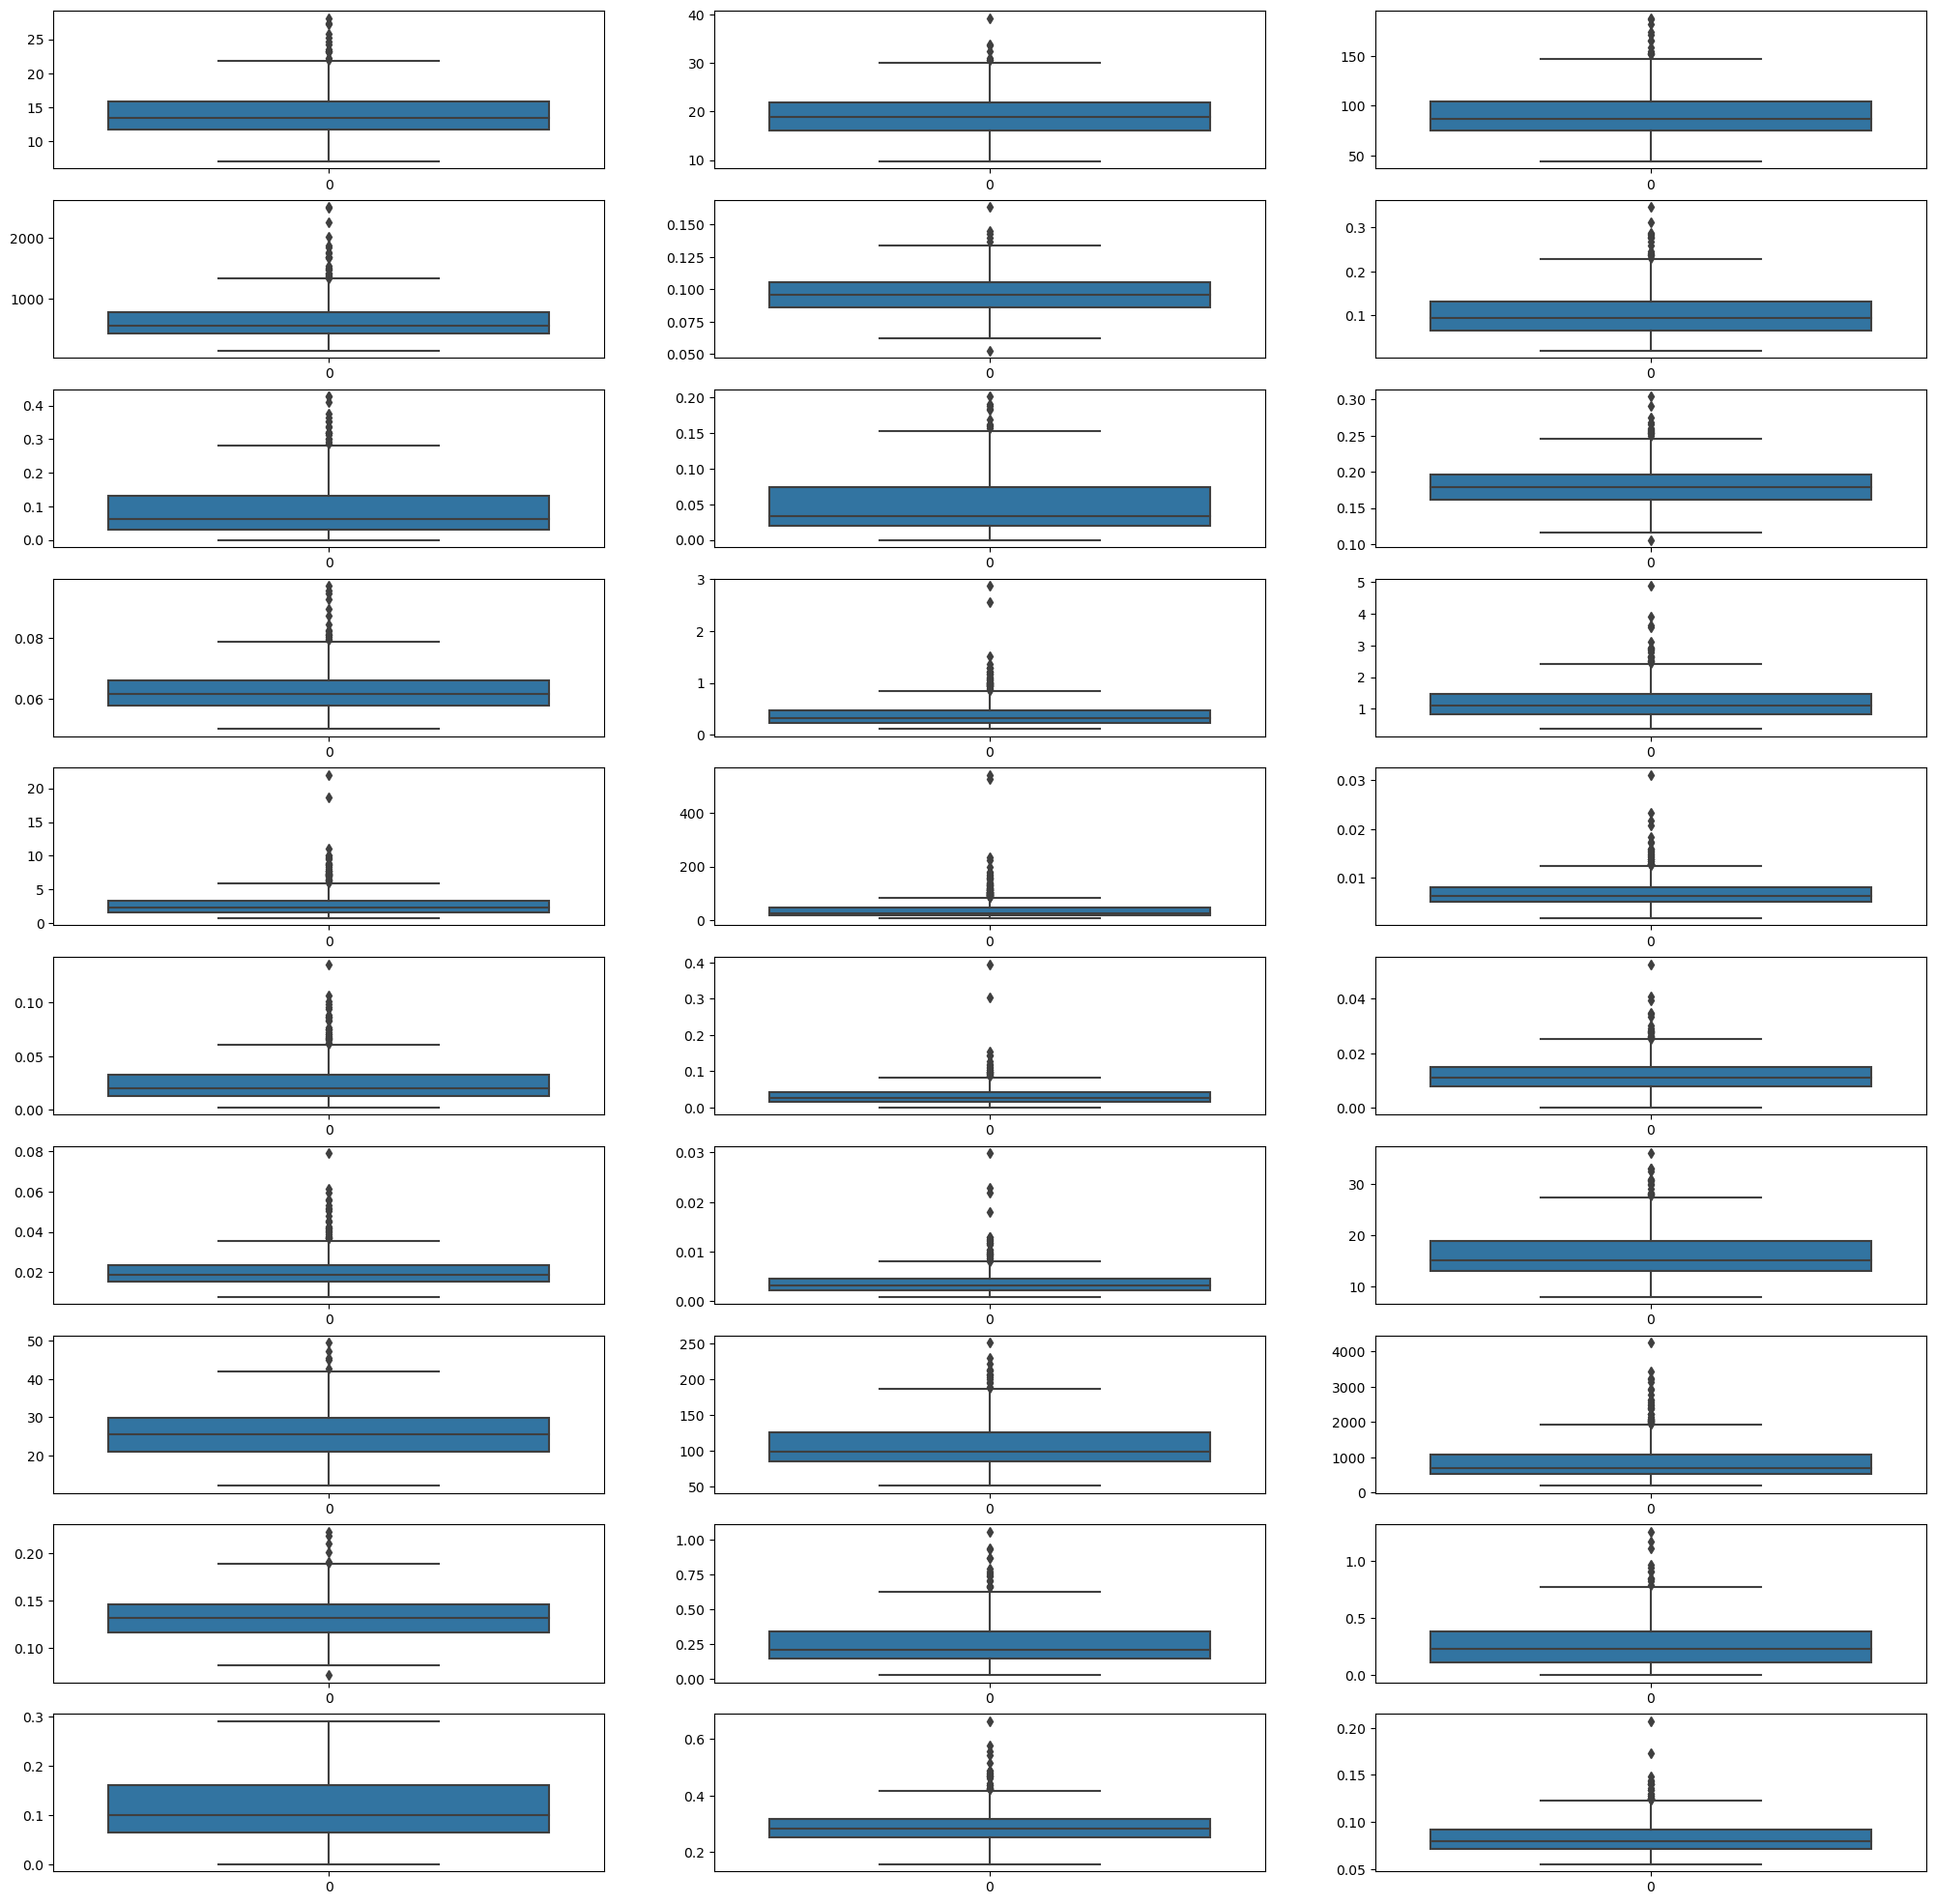

In [77]:
# Outliers detection 
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=10,ncols=3,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

In [78]:
# Treatment of outliers 
for col in df_numeric_col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    MX=Q3+(1.5*IQR)
    MN=Q1-(1.5*IQR)
    df[col]=np.where(df[col]>MX,MX,df[col])

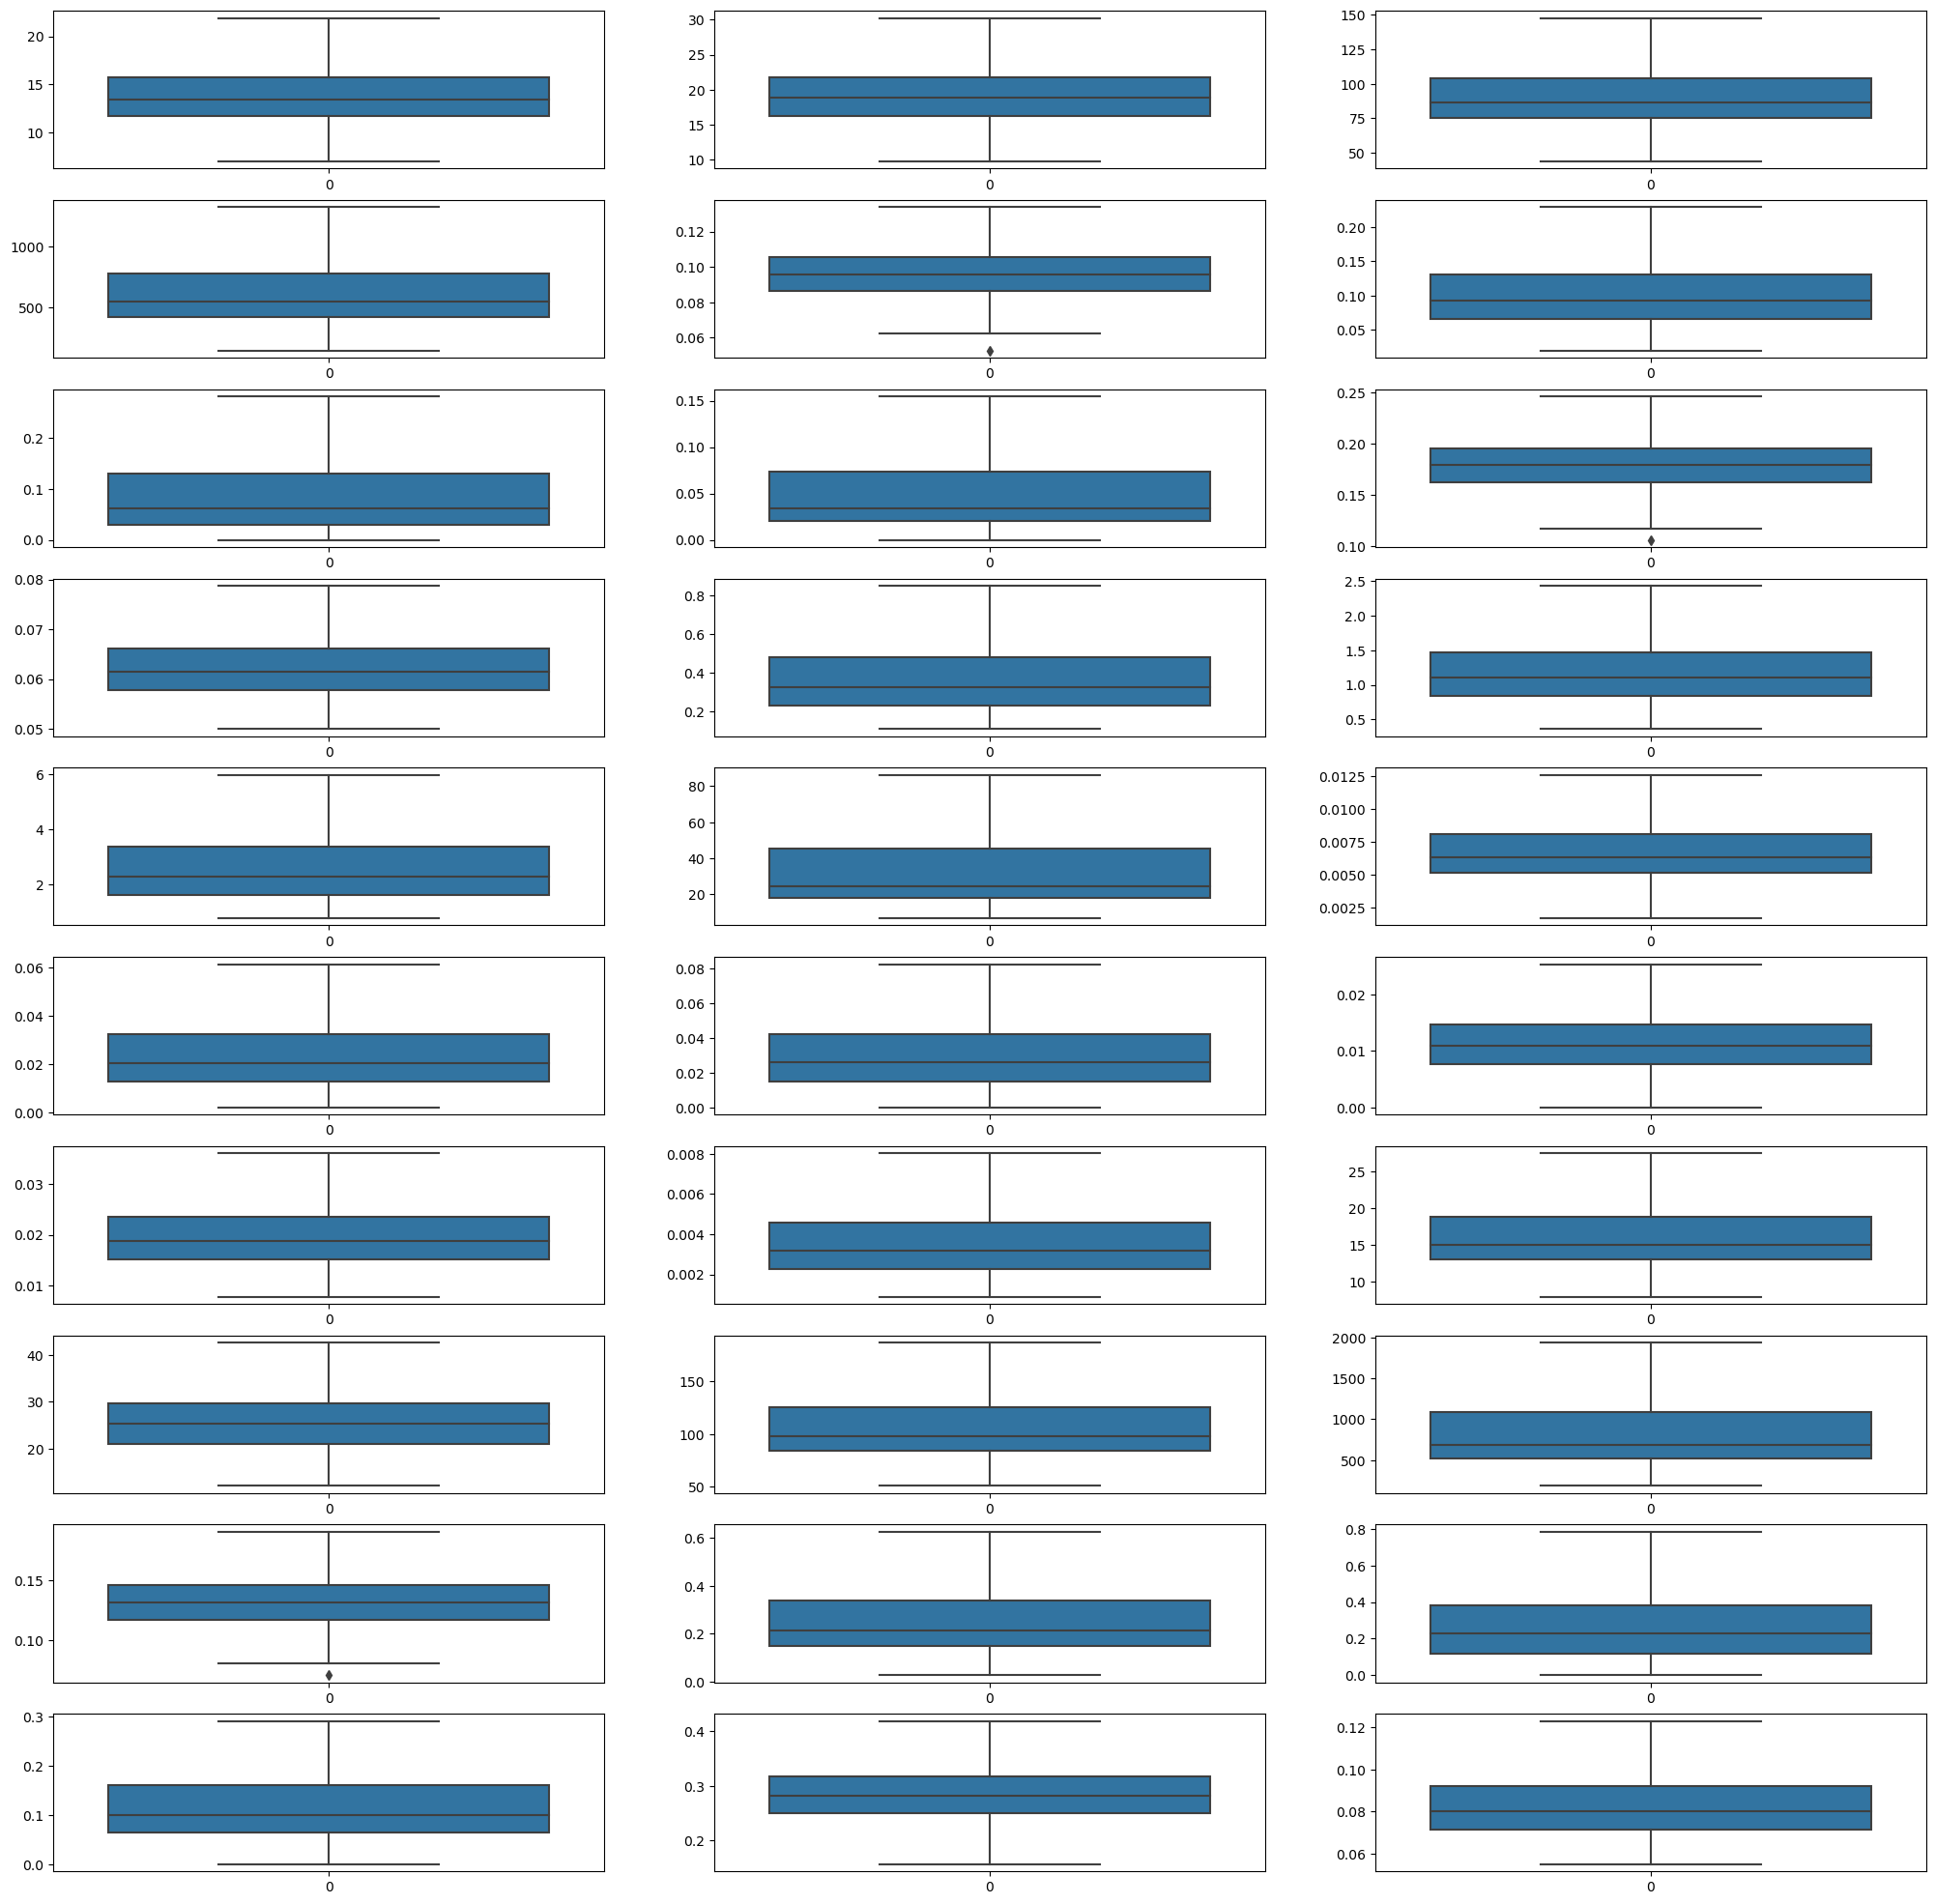

In [79]:
# Outliers detection 
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots(nrows=10,ncols=3,figsize=[25,25])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

In [80]:
# Treatment of the categorical features
LE=LabelEncoder()
df["diagnosis"]=LE.fit_transform(df["diagnosis"])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,1,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,1,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,1,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [82]:
# Data Standardization
SS=StandardScaler()
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]
Scaled_x=SS.fit_transform(X)

In [84]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(Scaled_x,y,random_state=42,test_size=0.2,train_size=0.8)

In [87]:
Scaled_x.shape

(569, 30)

In [99]:
# Model Building 
# Base Model 
model=keras.Sequential()
# Adding Layers
model.add(keras.layers.Dense(input_dim=30,units=1000,activation="relu")) # Input Layer
model.add(keras.layers.Dense(units=250,activation="relu")) # Hidden layer
model.add(keras.layers.Dense(units=1,activation="sigmoid")) # Output layer
# Model Compilation 
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")
# Model Fitting
hist=model.fit(X_train,y_train,epochs=20)

Epoch 1/20
15/15 [==============================] - 1s 8ms/step - loss: 0.2213 - accuracy: 0.8989
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0796 - accuracy: 0.9714
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0469 - accuracy: 0.9846
Epoch 4/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0344 - accuracy: 0.9912
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0166 - accuracy: 0.9956
Epoch 7/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0116 - accuracy: 0.9956
Epoch 8/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0089 - accuracy: 0.9978
Epoch 9/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 10/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 11/20
15/15 [

In [100]:
# Model testing (F1 score)
prediction_pro=model.predict(X_test)
prediction=[]
for p in prediction_pro:
    if p<0.5:
        prediction.append(0)
    else:
        prediction.append(1)
print(metrics.f1_score(y_test,prediction))

4/4 [==============================] - 0s 6ms/step
0.9534883720930233


In [103]:
# Evaluation of model
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 11ms/step - loss: 0.1279 - accuracy: 0.9649


[0.12786509096622467, 0.9649122953414917]

Text(0, 0.5, 'loss')

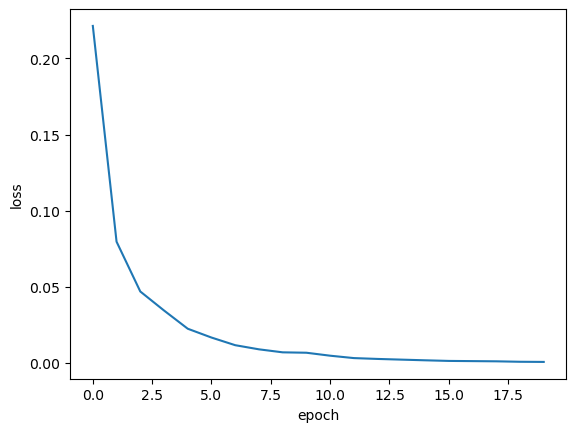

In [106]:
# Graph
plt.plot(hist.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")

# Thank You 